# Setting up Necessary things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs=32



In [2]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/MasterCourse/Electronics Recognizer

/content/drive/My Drive/MasterCourse/Electronics Recognizer


# Fetching Data

In [ ]:
data_path = '/content/drive/MyDrive/MasterCourse/Electronics Recognizer/data/'

# Get a list of all image files in the specified directory
image_files = get_image_files(data_path)

# Create a list to store valid image files
valid_image_files = []

# Filter out non-existent files
for img_file in image_files:
    if os.path.exists(img_file):
        valid_image_files.append(img_file)

# Define your custom DataBlock and DataLoaders
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=lambda x: valid_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(data_path, bs=32)



In [ ]:
len(data)

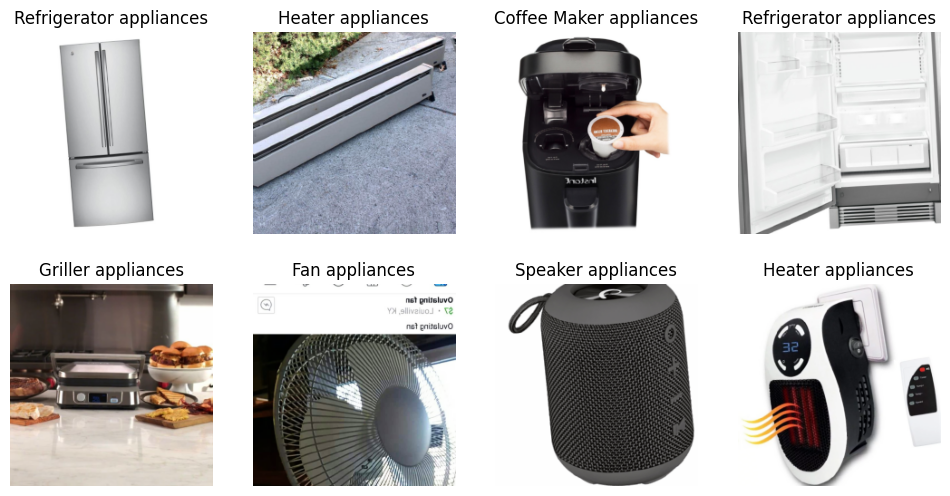

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

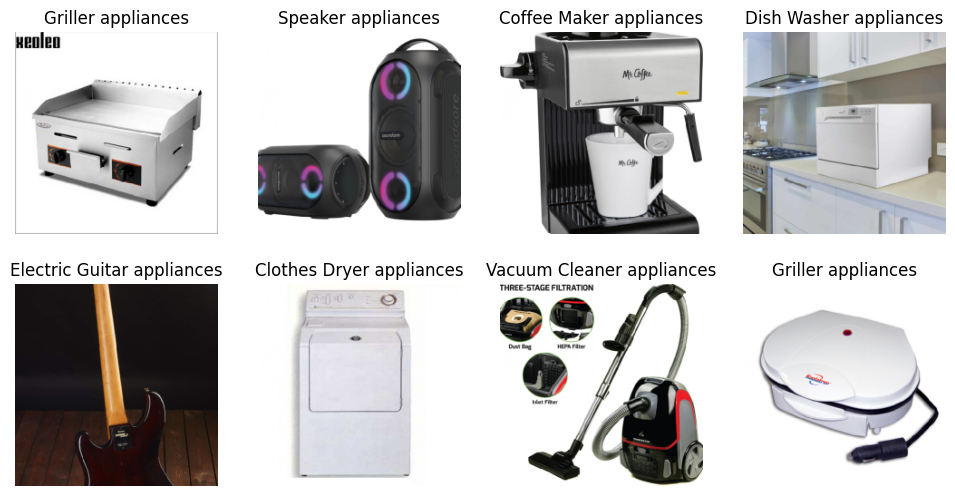

In [ ]:
dls.valid.show_batch(max_n=8,nrows=2)

# Training and Data Cleaning

## Model Version 1

In [ ]:
model_path="models"

In [ ]:
model=vision_learner(dls,resnet34,metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 173MB/s]


In [ ]:
model.load(f"elec-recognizer-v1")

In [ ]:
model.fine_tune(1) #version ==> 1

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.255119,0.131615,0.037831,0.962169,13:14


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.274422,0.167825,0.056747,0.943253,03:34


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
model.save(f"elec-recognizer-v1-updated")
torch.save(dls, f"dataloaders/elec_dataloader_v1-updated.pkl")
model.export(f"{model_path}/elec-recognizer-v1-updated.pkl")

## Model Version 2

In [ ]:
model=vision_learner(dls,resnet34,metrics=[error_rate,accuracy])
model.load(f"elec-recognizer-v2")

In [ ]:
model.fine_tune(1) #version => 2

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.576895,0.362120,0.099622,0.900378,03:28


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.503527,0.355673,0.109710,0.890290,03:28


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# model.fine_tune(1) #version => 2

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.903404,0.821042,0.240000,0.760000,23:28


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.839251,0.586019,0.182500,0.817500,31:30


In [ ]:
model.save(f"elec-recognizer-v2-updated")
torch.save(dls, f"dataloaders/elec_dataloader_v2-updated.pkl")
model.export(f"{model_path}/elec-recognizer-v2-updated.pkl")

## Model Version 4

In [6]:
dls = torch.load(f"dataloaders/elec_dataloader_v4.pkl")


In [7]:
dls.train.vocab

['Air Conditioner appliances', 'Air Fryer appliances', 'Blender appliances', 'Clothes Dryer appliances', 'Coffee Maker appliances', 'Dish Washer appliances', 'Electric Guitar appliances', 'Electric toothbrush appliances', 'Fan appliances', 'Griller appliances', 'Hair dryer appliances', 'Heater appliances', 'Induction cooktop appliances ', 'Iron appliances', 'Kettle appliances', 'Microwave appliances', 'Mixer appliances', 'Refrigerator appliances', 'Rice Cooker appliances', 'Speaker appliances', 'Toaster appliances', 'Vacuum Cleaner appliances']

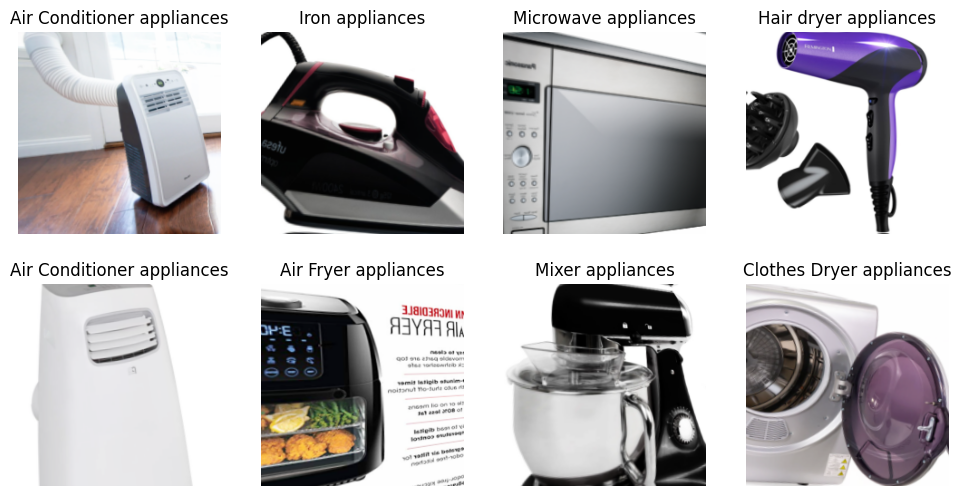

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

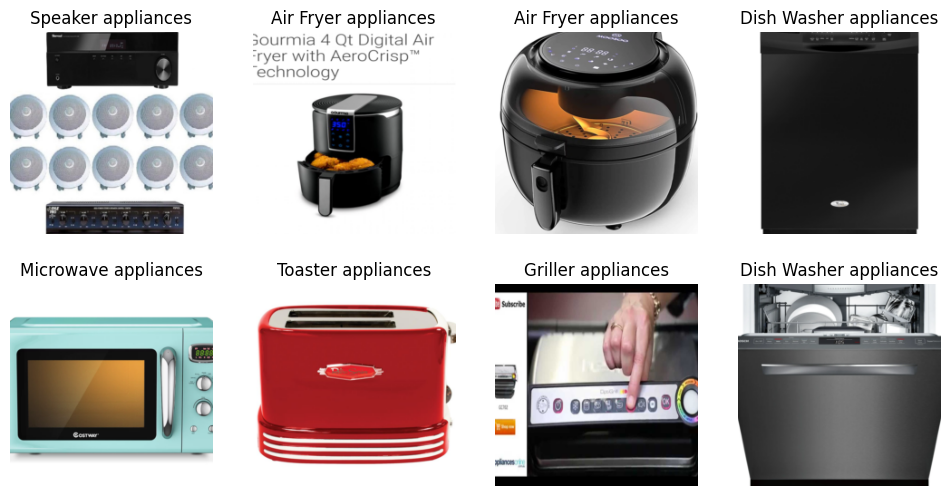

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
model=vision_learner(dls,resnet34,metrics=[error_rate,accuracy])
model.load(f"elec-recognizer-v4")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 110MB/s]


In [ ]:
model.fine_tune(5) #version => 4

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.212146,0.431054,0.111111,0.888889,13:29


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.207861,0.421589,0.118687,0.881313,02:24
1,0.304130,0.526457,0.138889,0.861111,02:21
2,0.282095,0.473714,0.106061,0.893939,02:21
3,0.167093,0.432195,0.103535,0.896465,02:23
4,0.111516,0.422589,0.085859,0.914141,02:22


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

# Cleaning

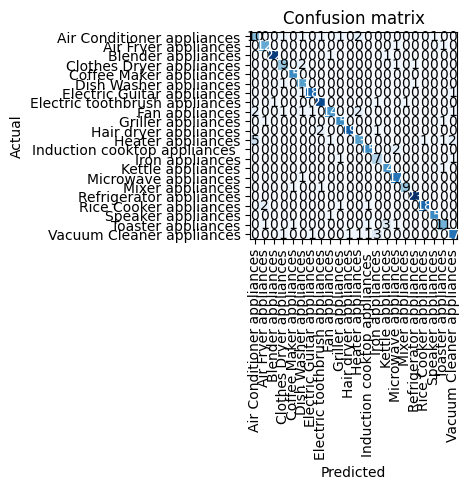

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix();

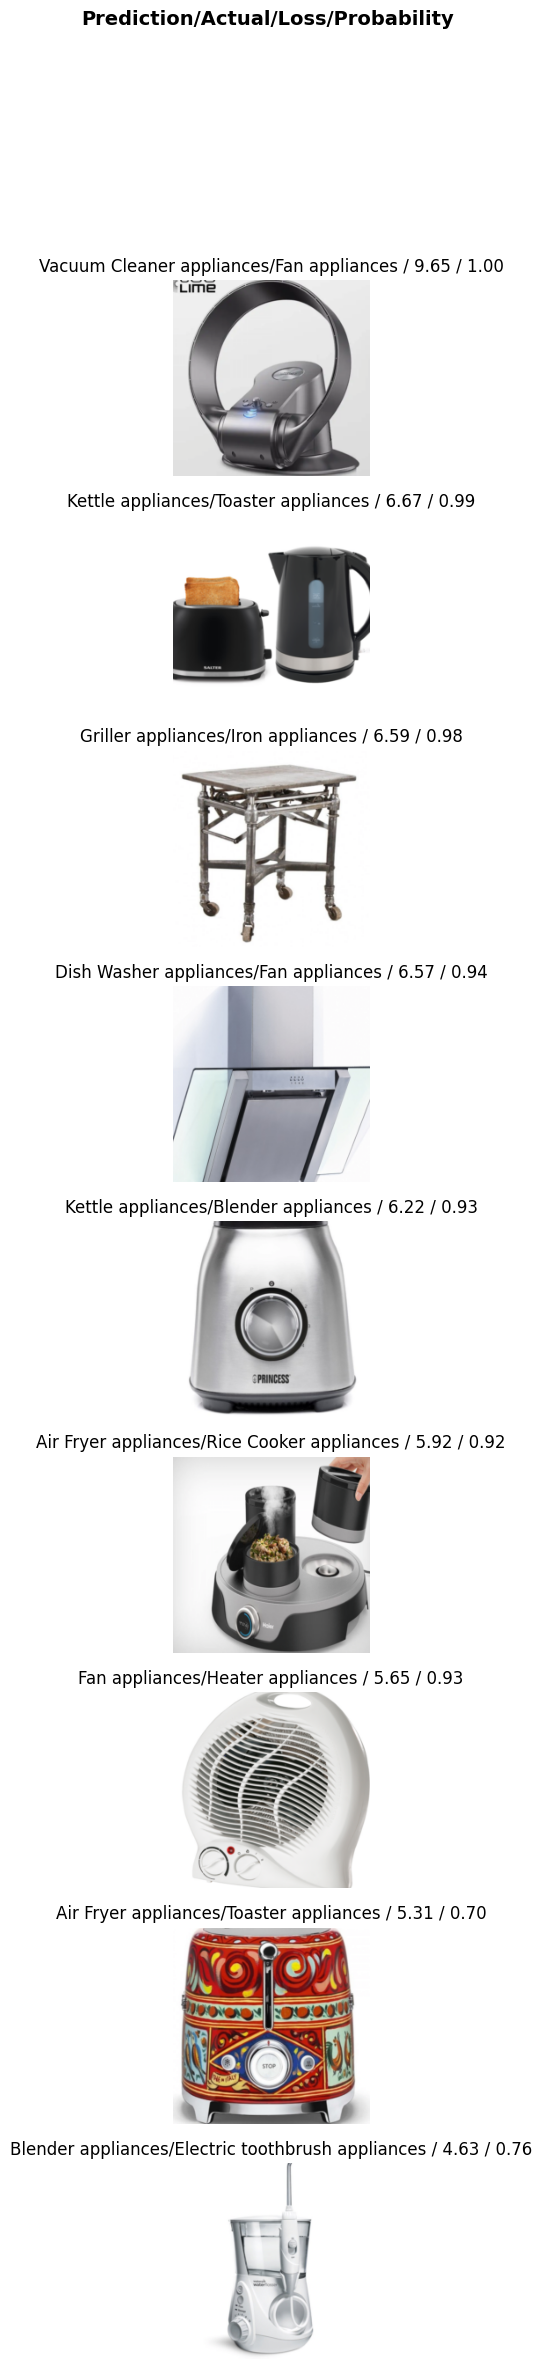

In [ ]:
interp.plot_top_losses(9, nrows=9)

In [ ]:
try:
    cleaner = ImageClassifierCleaner(model)
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
cleaner

In [ ]:
cleaner.delete()

(#0) []

In [ ]:
cleaner.change()

(#0) []

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [ ]:

for idx, cat in cleaner.change():
    source_path = str(cleaner.fns[idx])
    destination_path = f"{data_path}/{cat}"

    try:
        shutil.move(source_path, destination_path)
        print(f"Moved {source_path} to {destination_path}")
    except Exception as e:
        print(f"Error moving file {source_path} to {destination_path}: {e}")


Error moving file data/Mixer appliances/4489534b-dcff-4549-892f-15824dcaa584.jpg to data/Blender appliances: Destination path 'data/Blender appliances/4489534b-dcff-4549-892f-15824dcaa584.jpg' already exists
Error moving file data/Mixer appliances/dd6e4c42-8344-4be7-aaa5-217df52f3b6b.jpg to data/Blender appliances: Destination path 'data/Blender appliances/dd6e4c42-8344-4be7-aaa5-217df52f3b6b.jpg' already exists
Error moving file data/Mixer appliances/a196ecb0-96c2-4359-b201-46c281964f63.jpg to data/Blender appliances: Destination path 'data/Blender appliances/a196ecb0-96c2-4359-b201-46c281964f63.jpg' already exists
Error moving file data/Mixer appliances/8399cb13-a716-4c3f-8603-85bf2d866137.jpg to data/Blender appliances: Destination path 'data/Blender appliances/8399cb13-a716-4c3f-8603-85bf2d866137.jpg' already exists
Error moving file data/Mixer appliances/e4a29ee4-4296-460d-9b0a-9b9b2c17fd0d.jpg to data/Blender appliances: Destination path 'data/Blender appliances/e4a29ee4-4296-460

# Export Model for inference

In [ ]:
model.export(f"{model_path}/elec-recognizer-v{version}.pkl")